In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.rcParams['savefig.dpi'] = 250
plt.rcParams['figure.dpi'] = 100
plt.rcParams['axes.facecolor'] = 'white'
%matplotlib inline

In [3]:
! mkdir -p figures
! mkdir -p data

### Assert metadata values

In [4]:
MAIN=pd.read_table('./RNA_ENA_table.tsv')
MAIN

,study_accession,sample_accession,experiment_accession,run_accession,submission_accession,scientific_name,library_layout,library_strategy,read_count,experiment_title,study_alias,run_alias,fastq_bytes,fastq_ftp,sra_bytes,sra_ftp,sra_aspera,sra_galaxy
0,PRJNA208437,SAMN02203972,SRX305882,SRR900927,SRA091111,Mus musculus,PAIRED,RNA-Seq,29821675,Illumina Genome Analyzer IIx sequencing: GSM11...,GSE47948,GSM1163076_r1,998104505;1004179646,ftp.sra.ebi.ac.uk/vol1/fastq/SRR900/SRR900927/...,1105938162,ftp.sra.ebi.ac.uk/vol1/srr/SRR900/SRR900927,fasp.sra.ebi.ac.uk:/vol1/srr/SRR900/SRR900927,ftp.sra.ebi.ac.uk/vol1/srr/SRR900/SRR900927
1,PRJNA208437,SAMN02203968,SRX305884,SRR900929,SRA091111,Mus musculus,PAIRED,RNA-Seq,21046646,Illumina Genome Analyzer IIx sequencing: GSM11...,GSE47948,GSM1163078_r1,722812759;705217562,ftp.sra.ebi.ac.uk/vol1/fastq/SRR900/SRR900929/...,787651991,ftp.sra.ebi.ac.uk/vol1/srr/SRR900/SRR900929,fasp.sra.ebi.ac.uk:/vol1/srr/SRR900/SRR900929,ftp.sra.ebi.ac.uk/vol1/srr/SRR900/SRR900929
2,PRJNA208437,SAMN02203966,SRX305885,SRR900930,SRA091111,Mus musculus,PAIRED,RNA-Seq,20436530,Illumina Genome Analyzer IIx sequencing: GSM11...,GSE47948,GSM1163079_r1,702648957;684032481,ftp.sra.ebi.ac.uk/vol1/fastq/SRR900/SRR900930/...,766284164,ftp.sra.ebi.ac.uk/vol1/srr/SRR900/SRR900930,fasp.sra.ebi.ac.uk:/vol1/srr/SRR900/SRR900930,ftp.sra.ebi.ac.uk/vol1/srr/SRR900/SRR900930
3,PRJNA208437,SAMN02203971,SRX305888,SRR900933,SRA091111,Mus musculus,PAIRED,RNA-Seq,29718414,Illumina Genome Analyzer IIx sequencing: GSM11...,GSE47948,GSM1163082_r1,1004564767;1006496505,ftp.sra.ebi.ac.uk/vol1/fastq/SRR900/SRR900933/...,1117430561,ftp.sra.ebi.ac.uk/vol1/srr/SRR900/SRR900933,fasp.sra.ebi.ac.uk:/vol1/srr/SRR900/SRR900933,ftp.sra.ebi.ac.uk/vol1/srr/SRR900/SRR900933
4,PRJNA208437,SAMN02203963,SRX305883,SRR900928,SRA091111,Mus musculus,PAIRED,RNA-Seq,22513124,Illumina Genome Analyzer IIx sequencing: GSM11...,GSE47948,GSM1163077_r1,746387994;746571148,ftp.sra.ebi.ac.uk/vol1/fastq/SRR900/SRR900928/...,829155063,ftp.sra.ebi.ac.uk/vol1/srr/SRR900/SRR900928,fasp.sra.ebi.ac.uk:/vol1/srr/SRR900/SRR900928,ftp.sra.ebi.ac.uk/vol1/srr/SRR900/SRR900928
5,PRJNA208437,SAMN02203967,SRX305887,SRR900932,SRA091111,Mus musculus,PAIRED,RNA-Seq,21071242,Illumina Genome Analyzer IIx sequencing: GSM11...,GSE47948,GSM1163081_r1,717360246;704697229,ftp.sra.ebi.ac.uk/vol1/fastq/SRR900/SRR900932/...,784208084,ftp.sra.ebi.ac.uk/vol1/srr/SRR900/SRR900932,fasp.sra.ebi.ac.uk:/vol1/srr/SRR900/SRR900932,ftp.sra.ebi.ac.uk/vol1/srr/SRR900/SRR900932
6,PRJNA208437,SAMN02203964,SRX305886,SRR900931,SRA091111,Mus musculus,PAIRED,RNA-Seq,21575801,Illumina Genome Analyzer IIx sequencing: GSM11...,GSE47948,GSM1163080_r1,741094896;724616977,ftp.sra.ebi.ac.uk/vol1/fastq/SRR900/SRR900931/...,811549699,ftp.sra.ebi.ac.uk/vol1/srr/SRR900/SRR900931,fasp.sra.ebi.ac.uk:/vol1/srr/SRR900/SRR900931,ftp.sra.ebi.ac.uk/vol1/srr/SRR900/SRR900931
7,PRJNA208437,SAMN02203965,SRX305889,SRR900934,SRA091111,Mus musculus,PAIRED,RNA-Seq,28417090,Illumina Genome Analyzer IIx sequencing: GSM11...,GSE47948,GSM1163083_r1,963508489;954419180,ftp.sra.ebi.ac.uk/vol1/fastq/SRR900/SRR900934/...,1067031461,ftp.sra.ebi.ac.uk/vol1/srr/SRR900/SRR900934,fasp.sra.ebi.ac.uk:/vol1/srr/SRR900/SRR900934,ftp.sra.ebi.ac.uk/vol1/srr/SRR900/SRR900934


In [5]:

assert (MAIN['library_layout']   == 'PAIRED').all()
assert (MAIN['scientific_name']  == 'Mus musculus').all()
assert (MAIN['library_strategy'] == 'RNA-Seq').all()
assert (MAIN['study_accession']  == 'PRJNA208437').all()
DF = MAIN[['run_accession','experiment_title']].sort_values('run_accession').reset_index(drop=True)
assert DF['experiment_title'].is_unique and DF['run_accession'].is_unique

### Separate metadata cols and clean 

In [6]:
# split the SAMPLE_ID field
DF['SAMPLE_ID'] = DF['experiment_title'].str.split().str[6]
assert DF['SAMPLE_ID'].is_unique
DF['SAMPLE_ID']

0     RNA_ESC_Rep_1_JW-H9B
1    RNA_ESC_Rep_2_JW-H10B
2     RNA_MES_Rep_1_JW-H3B
3     RNA_MES_Rep_2_JW-H4B
4      RNA_CP_Rep_1_JW-H5B
5      RNA_CP_Rep_2_JW-H6B
6      RNA_CM_Rep_1_JW-H7B
7      RNA_CM_Rep_2_JW-H8B
Name: SAMPLE_ID, dtype: object

In [7]:

DF['TARGET']    = 'RNA'
DF['CELL_TYPE'] = DF['SAMPLE_ID'].str.extract(r'(ESC|MES|CP|CM)')
DF['REP']       = DF['SAMPLE_ID'].str.extract(r'(Rep_\d+)')
DF['REP']       = DF['REP'].str.extract(r'(\d+)')
assert DF.isna().any().sum() == 0
# modify the format
DF['OLD_SAMPLE_ID'] = DF['SAMPLE_ID']
DF['SUFFIX']        = 'Wamstad_2013_PE'
DF['SAMPLE_ID']     = DF['TARGET'].str.cat(DF[['CELL_TYPE','REP','SUFFIX']].values,sep='_')

In [8]:
DF

,run_accession,experiment_title,SAMPLE_ID,TARGET,CELL_TYPE,REP,OLD_SAMPLE_ID,SUFFIX
0,SRR900927,Illumina Genome Analyzer IIx sequencing: GSM11...,RNA_ESC_1_Wamstad_2013_PE,RNA,ESC,1,RNA_ESC_Rep_1_JW-H9B,Wamstad_2013_PE
1,SRR900928,Illumina Genome Analyzer IIx sequencing: GSM11...,RNA_ESC_2_Wamstad_2013_PE,RNA,ESC,2,RNA_ESC_Rep_2_JW-H10B,Wamstad_2013_PE
2,SRR900929,Illumina Genome Analyzer IIx sequencing: GSM11...,RNA_MES_1_Wamstad_2013_PE,RNA,MES,1,RNA_MES_Rep_1_JW-H3B,Wamstad_2013_PE
3,SRR900930,Illumina Genome Analyzer IIx sequencing: GSM11...,RNA_MES_2_Wamstad_2013_PE,RNA,MES,2,RNA_MES_Rep_2_JW-H4B,Wamstad_2013_PE
4,SRR900931,Illumina Genome Analyzer IIx sequencing: GSM11...,RNA_CP_1_Wamstad_2013_PE,RNA,CP,1,RNA_CP_Rep_1_JW-H5B,Wamstad_2013_PE
5,SRR900932,Illumina Genome Analyzer IIx sequencing: GSM11...,RNA_CP_2_Wamstad_2013_PE,RNA,CP,2,RNA_CP_Rep_2_JW-H6B,Wamstad_2013_PE
6,SRR900933,Illumina Genome Analyzer IIx sequencing: GSM11...,RNA_CM_1_Wamstad_2013_PE,RNA,CM,1,RNA_CM_Rep_1_JW-H7B,Wamstad_2013_PE
7,SRR900934,Illumina Genome Analyzer IIx sequencing: GSM11...,RNA_CM_2_Wamstad_2013_PE,RNA,CM,2,RNA_CM_Rep_2_JW-H8B,Wamstad_2013_PE


### Keep only the first 2 replicates per combination

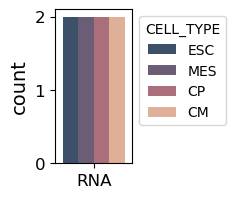

In [10]:
CT_COL_DICT = {'ESC': '#355070', 'MES': '#6d597a', 'CP': '#b56576','CM': '#eaac8b'}

plt.figure(figsize=(1,2))
ax = sns.countplot(data=DF,hue='CELL_TYPE',x='TARGET',palette=CT_COL_DICT)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xlabel('')
plt.savefig(f'./figures/RNA_REP_countplot_CT_HM.pdf', format="pdf", bbox_inches="tight")



In [51]:
RNA_TABLE=DF[['run_accession', 'SAMPLE_ID', 'TARGET', 'CELL_TYPE',
                                    'REP', 'OLD_SAMPLE_ID']]
RNA_TABLE.to_csv('./data/my_RNA_SRA_table.csv',index=False)
